# OOP and linear regression
Import necessary modules and init Faker with Polish localilization

In [50]:
%matplotlib inline

import matplotlib.pyplot as plt
import math
import numpy as np
from faker import Faker
import random
from sklearn import linear_model
from sklearn import datasets
import json
import requests
import urllib

fake = Faker('pl_PL')

Implement base class for `Student` and `PreSchool` classes

In [51]:
class Person:
    """Base class for Student, other w8ing for implementation"""
    def __init__(self, name, last_name):
        self.name = name
        self.last_name = last_name

`Student` class inherits from `Person` class.
Available methods:
- `mean_marks` - will return mean of marks for one student
- `attendance` - will return number of adsent days
- `identify` - prints out info about student

In [52]:
class Student(Person):
    """Inherited from Person class - implements basic functionalities for Student"""
    def __init__(self, name, last_name, index_nr, marks, absence):
        super().__init__(name, last_name)
        self.index_nr    = index_nr
        self.marks    = marks
        self.absence = absence
    def mean_marks(self):
        """Returns mean marks for student"""
        mean = np.mean(self.marks)
        return mean
    def attendance(self):
        """Returns string depending on nr of missed days"""
        if self.absence <= 2:
            return "good"
        else:
            return "bad"
    def identify(self):
        """Returns string: name, last_name, index: index_nr marks mean: mean_marks and is a student with
        attendance() - absence days"""
        print("%s %s, index: %s marks mean: %.1f, and is a student with %s attendance - %i days" % 
              (self.name, self.last_name, self.index_nr, self.mean_marks(), self.attendance(), self.absence))

`PreSchool` is same as `Student` with exception of `mean_marks` which will always return 5.0 and attendance that will return super/superb.

In [53]:
class PreSchooler(Person):
    """Inherited from Person class - implements basic functionalities for PreSchooler"""
    def __init__(self, name, last_name, index_nr, marks, absence):
        super().__init__(name, last_name)
        self.index_nr    = index_nr
        self.marks    = marks
        self.absence = absence
    def mean_marks(self):
        """Returns mean marks for preschooler but since we can not discourge them it will always be 5.0"""
        return 5.0
    def attendance(self):
        """Returns string depending on nr of missed days - they are sick a lot so options are only super/superb"""
        if self.absence <= 2:
            return "superb"
        else:
            return "super"
    def identify(self):
        """Returns string: name, last_name, index: index_nr marks mean: mean_marks and is a student with
        attendance() - absence days"""
        print("%s %s, index: %s marks mean: %.1f, and is a student with %s attendance - %i days" % 
              (self.name, self.last_name, self.index_nr, self.mean_marks(), self.attendance(), self.absence))

`ConnectionApi` connects to API endpoint to download data and convert to list of initialized objects of class **only** Student. Dosent't support `PreSchool` class. More infon about API: [Rails API](https://github.com/kajzer/school_api). Pass parameter (int) to limit amout of data to be returned by API. Hardcoded access_token for testing. API deployed on Heroku.

In [54]:
class ConnectionAPI:
    def __init__(self):
        pass
    @staticmethod
    def get_data(limit):
        """Download data from API endpoint. More info on API can be found: https://github.com/kajzer/school_api"""
        url ='https://still-sea-49183.herokuapp.com/api/v1/users?access_token=abracadabra&limit=%i' % (limit)
        response = requests.get(url)
        response.raise_for_status()
        studentData = json.loads(response.text)
        studentArray = list()
        for entry in studentData['users']:
            studentArray.append(Student(entry['name'], entry['last_name'], entry['index_nr'], entry['marks'], entry['absence']))
        return studentArray

`ClassInterpretation` takes either `Student` or `PreSchool` class as argument. Implements one class variable `school_name`. Sample usage of all methods bellow class. For each method you can call `?` or `help()` ex: `adam.mean_marks?` or `help(adam.mean_marks)`

In [55]:
class ClassInterpretation:
    
    school_name = "School of rock"
    
    def __init__(self, student_class):
        self._class_list = []
        self.student_class = student_class
    
    def __str__(self):
        """returns information about students in the class"""
        return "There is %i students in the class room. Mean of marks of all students is: %.1f. Median of all means is: %i" % (len(self.class_list), self.mean(), self.median())
    
    def __float__(self):
        """returns mean of all means of all students"""
        return float(round(self.mean(), 2))
    
    def __len__(self):
        """returns length of student list"""
        return len(self.class_list)
    
    def __add__(self, other):
        """adds studetn to do class list
        Usage: 
        someClass = ClassInterpretation(Student)
        someClass+['Oliwier', 'Hanusiak', 5214, [4, 5, 3, 4], 2]"""
        self.class_list.append(self.student_class(*other))
        
    @property
    def class_list(self):
        """when called generates random list of students with random length from 15 to 20 students
        when assigned value will generate random list of students with given length"""
        if len(self._class_list) < 1:
            self.class_list = random.randint(15, 20)
            return self._class_list
        else:
            return self._class_list
        
    @class_list.setter
    def class_list(self, nr_students):
        gen_list = list()
        for _ in range(nr_students):
            name = fake.name().split(' ')[-2]
            last_name = fake.name().split(' ')[-1]
            index_nr = random.randint(1000,9999)
            marks = [random.randint(2, 5) for x in range(random.randint(3, 6))]
            absence = -3*int(round(np.mean(marks)))+14
            gen_list.append(self.student_class(name, last_name, index_nr, marks, absence)) 
        self._class_list = gen_list
        
    @classmethod
    def set_school_name(cls, new_school_name):
        """sets class varaible value"""
        cls.school_name = new_school_name
        
    @classmethod
    def print_school_name(cls):
        """prints class variable"""
        print("This school is named:", cls.school_name)
        
    @staticmethod
    def std_deviation(elm_list):
        """returns standard deviation of given list"""
        my_mean = np.mean(elm_list)
        my_sum = sum([(x - my_mean)**2 for x in elm_list])
        return math.sqrt(my_sum/len(elm_list))
    
    def mean(self):
        """returns mean of all student marks in class"""
        mean = np.mean([atendee.mean_marks() for atendee in self.class_list])
        return mean
    
    def median(self):
        """returns median from mean od all students"""
        median = np.median([atendee.mean_marks() for atendee in self.class_list])
        return median
    
    def print_students(self):
        """prints out info about every student"""
        for atendee in self.class_list:
            atendee.identify()
            
    def get_mean_absence_arrays(self):
        """helper method for linear regression, trying out returning multiple values with tuple"""
        mean_marks = np.array([x.mean_marks() for x in self.class_list])
        absence_days = np.array([x.absence for x in self.class_list])
        return (mean_marks, absence_days)
    
    def plot_students(self):
        """plot students with matplotlib"""
        mean_marks, absence_days = self.get_mean_absence_arrays()
        plt.scatter(mean_marks, absence_days,color='black')
        plt.xlabel("mean marks")
        plt.ylabel("# of abence days")
        plt.show()
        
    def linear_regression(self):
        """create linear regression model with sklearn"""
        reg=linear_model.LinearRegression()
        mean_marks, absence_days = self.get_mean_absence_arrays()
        mean_marks, absence_days = mean_marks.reshape(-1, 1), absence_days.reshape(-1, 1)
        reg.fit(mean_marks, absence_days)
        m=reg.coef_[0]
        b=reg.intercept_
        print("slope=",m, "intercept=",b)
        y_pred = reg.predict(mean_marks)
        plt.scatter(mean_marks, absence_days,color='black')
        plt.plot(mean_marks, y_pred, 'b')
        plt.xlabel("mean marks")
        plt.ylabel("# of abence days")
        plt.show()
        
    def predict_nr_days_absence(self, mean):
        """returns predicted # of days of absence based on a given mean of marks"""
        reg=linear_model.LinearRegression()
        mean_marks, absence_days = self.get_mean_absence_arrays()
        mean_marks, absence_days = mean_marks.reshape(-1, 1), absence_days.reshape(-1, 1)
        reg.fit(mean_marks, absence_days)
        return reg.predict(mean)
    def get_students_from_api(self, limit):
        """Download data from API endpoint. More info on API can be found: https://github.com/kajzer/school_api and return as Student list"""
        self._class_list = ConnectionAPI.get_data(limit)

Standard deviation thanks to `@staticmethod` decorator

In [56]:
ClassInterpretation.std_deviation([2, 5, 8, 4, 6, 7])

1.9720265943665387

Print school name with `print_school_name` `@classmethod` change name and print again

In [57]:
ClassInterpretation.print_school_name()
ClassInterpretation.set_school_name('New school name')
ClassInterpretation.print_school_name()

This school is named: School of rock
This school is named: New school name


Instantiate `ClassInterpretation` to some_school variable passing `Student` class as argument. Class can be instantiatet by passing `PreSchool` class as well. Implemented variation of **simple abstract factory** design pattern.

In [58]:
some_school = ClassInterpretation(Student)

Usage of dunder methods `__str__` `__float__` `__len__` and `__add__` more info with `help()`

In [59]:
print(some_school)
print(float(some_school))
help(some_school.__float__)
print(len(some_school))
print("Adding new atendee")
some_school+['Oliwier', 'Hanusiak', 5214, [4, 5, 3, 4], 2]
print(len(some_school))

There is 15 students in the class room. Mean of marks of all students is: 3.4. Median of all means is: 3
3.45
Help on method __float__ in module __main__:

__float__() method of __main__.ClassInterpretation instance
    returns mean of all means of all students

15
Adding new atendee
16


Usage of `print_students()` method

In [60]:
print(len(some_school))
some_school.class_list = 5
print(len(some_school))

some_school.print_students()

some_school+['Oliwier', 'Hanusiak', 5214, [4, 5, 3, 4], 2]
print('\n')
some_school.print_students()

16
5
Stefan Zatoń, index: 4806 marks mean: 3.4, and is a student with bad attendance - 5 days
Eliza Holeksa, index: 9920 marks mean: 3.7, and is a student with good attendance - 2 days
Sara Sztuczka, index: 7957 marks mean: 4.6, and is a student with good attendance - -1 days
Hubert Szoka, index: 5510 marks mean: 3.6, and is a student with good attendance - 2 days
Lidia Latek, index: 9326 marks mean: 3.0, and is a student with bad attendance - 5 days


Stefan Zatoń, index: 4806 marks mean: 3.4, and is a student with bad attendance - 5 days
Eliza Holeksa, index: 9920 marks mean: 3.7, and is a student with good attendance - 2 days
Sara Sztuczka, index: 7957 marks mean: 4.6, and is a student with good attendance - -1 days
Hubert Szoka, index: 5510 marks mean: 3.6, and is a student with good attendance - 2 days
Lidia Latek, index: 9326 marks mean: 3.0, and is a student with bad attendance - 5 days
Oliwier Hanusiak, index: 5214 marks mean: 4.0, and is a student with good attendance - 2 days

Usage of `mean` and `median` methods

In [61]:
print(some_school.mean())
print(some_school.median())

3.711111111111111
3.6333333333333333


Increase number of students and use `plot_students` to plot out number of abcence days and mean marks of a atendee

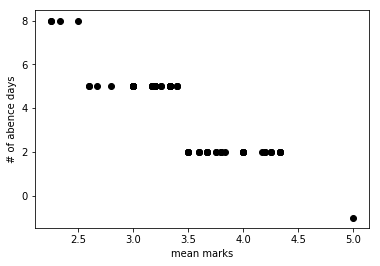

In [62]:
some_school.class_list = 80
some_school.plot_students()

Training linear regression model to predict dependancy od atendees mean mark and number of days of absence

slope= [-3.01603943] intercept= [14.17871832]


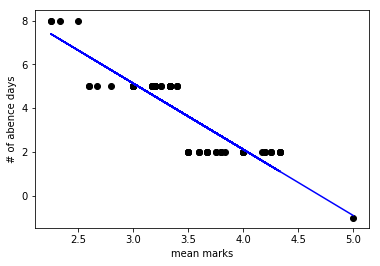

In [63]:
some_school.linear_regression()

Predict number of days of absence based on given mean mark

In [64]:
print(int(some_school.predict_nr_days_absence(3.5)[0][0]))

3


In [65]:
Student.__dict__

mappingproxy({'__module__': '__main__',
              '__doc__': 'Inherited from Person class - implements basic functionalities for Student',
              '__init__': <function __main__.Student.__init__(self, name, last_name, index_nr, marks, absence)>,
              'mean_marks': <function __main__.Student.mean_marks(self)>,
              'attendance': <function __main__.Student.attendance(self)>,
              'identify': <function __main__.Student.identify(self)>})

In [66]:
help(some_school.get_students_from_api)

Help on method get_students_from_api in module __main__:

get_students_from_api(limit) method of __main__.ClassInterpretation instance
    Download data from API endpoint. More info on API can be found: https://github.com/kajzer/school_api and return as Student list



Get students from **API**

In [67]:
some_school.get_students_from_api(25)

Print out students from API

In [68]:
some_school.print_students()

Krystyna Nowacki, index: 44603138 marks mean: 2.8, and is a student with bad attendance - 5 days
Beata Walicki, index: 40745225 marks mean: 3.2, and is a student with bad attendance - 4 days
Ambroży Bielecki, index: 59739241 marks mean: 3.8, and is a student with good attendance - 2 days
Gerwazy Gombrowicz, index: 59460013 marks mean: 4.2, and is a student with good attendance - 1 days
Joanna Śliwa, index: 29453084 marks mean: 3.6, and is a student with bad attendance - 3 days
Aleksandra Piwowarczyk, index: 59081879 marks mean: 3.0, and is a student with bad attendance - 5 days
Jadwiga Królikowska, index: 28961493 marks mean: 2.7, and is a student with bad attendance - 6 days
Daniel Stychlerz, index: 28270521 marks mean: 4.3, and is a student with good attendance - 1 days
Mariola Tatarczyk, index: 00813668 marks mean: 3.7, and is a student with bad attendance - 3 days
Zofia Regulski, index: 33195403 marks mean: 3.2, and is a student with bad attendance - 4 days
Gabriela Kaczorowski, in

Print out students from API Endpoint

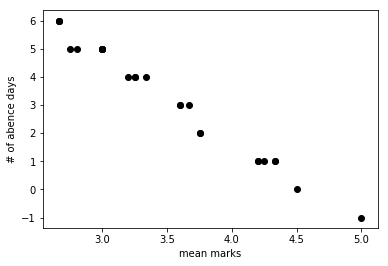

In [70]:
some_school.plot_students()

Make prediction from API Students

slope= [-3.0348744] intercept= [13.8944324]


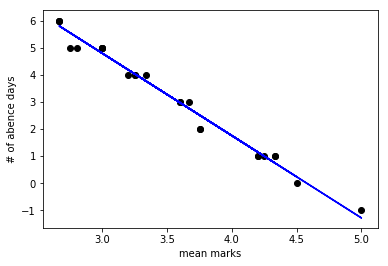

In [71]:
some_school.linear_regression()